##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 5 Report

## Group Members:

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import dynworm as dw

## Exercise 1: Visualize brain connectomes

<img src="lab5_exercise1.png" width="1000">

In [2]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

In [3]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])

[[0 0 0 3 0 0 7 0 0 0]
 [0 0 1 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [4]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10])

['sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory'
 'sensory' 'sensory' 'sensory']


In [5]:
def vis_conn(syn_conn, neuron_classes):
    
    sensory_index=[] # create lists to store index of each category
    inter_index=[]
    motor_index=[]
    
    for i in range(0,len(neuron_classes)): # iterate through neuron_classes to get the index of the corresponding vertices
        if neuron_classes[i]=='sensory':
            sensory_index.append(i)
        elif neuron_classes[i]=='inter':
            inter_index.append(i)
        else:
            motor_index.append(i)
    
    sensory=np.zeros((len(sensory_index), len(sensory_index)), dtype='int') # create adjacent matrices for three categories
    inter=np.zeros((len(inter_index), len(inter_index)), dtype='int')
    motor=np.zeros((len(motor_index), len(motor_index)), dtype='int')
    
    for i in range(0,len(sensory_index)): # use index to move data from syn_conn to sub matrix
        for j in range(0,len(sensory_index)):
            sensory[i][j]=syn_conn[sensory_index[i]][sensory_index[j]]
    
    for i in range(0,len(inter_index)):
        for j in range(0,len(inter_index)):
            inter[i][j]=syn_conn[inter_index[i]][inter_index[j]]
    
    for i in range(0,len(motor_index)):
        for j in range(0,len(motor_index)):
            motor[i][j]=syn_conn[motor_index[i]][motor_index[j]]
        
    fig = plt.figure(2, figsize=(15,5))
    plt.subplot(131)                        # highlight all non-zero edge
    plt.pcolor(sensory, cmap = 'Greys', vmin = 0, vmax = 1) # Use plt.pcolor to visualize the adjacency matrix
    plt.ylim(len(sensory), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Sensory', fontsize=20)                       # Set appropriate x-label, size of num
    plt.ylabel('Sensory', fontsize=20)                       # Set appropriate y-label
    plt.xticks(fontsize=20)                                          # Set x-ticks size
    plt.yticks(fontsize=20)                                          # Set y-ticks size

    
    plt.subplot(132)
    plt.pcolor(inter, cmap = 'Greys', vmin = 0, vmax = 1) # Use plt.pcolor to visualize the adjacency matrix
    plt.ylim(len(inter), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Inter', fontsize=20)                       # Set appropriate x-label
    plt.ylabel('Inter', fontsize=20)                       # Set appropriate y-label
    plt.xticks(fontsize=20)                                          # Set x-ticks size
    plt.yticks(fontsize=20)                                          # Set y-ticks size
   
    
    plt.subplot(133)
    plt.pcolor(motor, cmap = 'Greys', vmin = 0, vmax = 1) # Use plt.pcolor to visualize the adjacency matrix
    plt.ylim(len(motor), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Motor', fontsize=20)                       # Set appropriate x-label
    plt.ylabel('Motor', fontsize=20)                       # Set appropriate y-label
    plt.xticks(fontsize=20)                                     # Set x-ticks size
    plt.yticks(fontsize=20)                                          # Set y-ticks size
    plt.show()
    
    

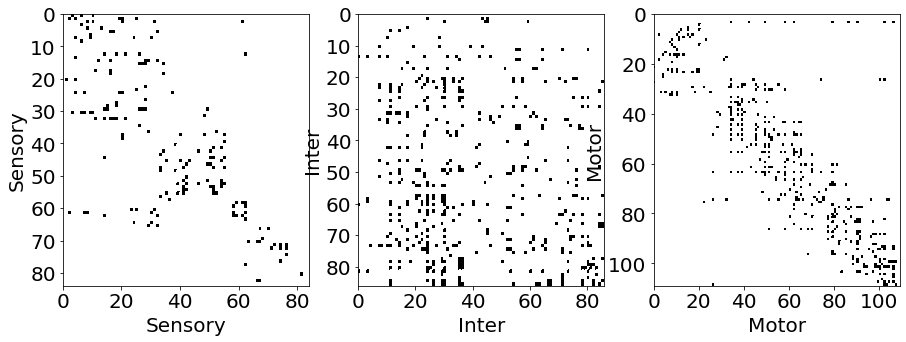

In [6]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

## Exercise 2: Locating the most connected vertices

<img src="lab5_exercise2.png" width="1000">

In [7]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [8]:
def find_hub_vertices(adj_mat, num_vertices):
    
    adj_mat_t=adj_mat.copy().T # transpose of adj_mat so we can get in-degrees faster, then sum each row, target
    indegree=np.zeros(adj_mat_t.shape[0]) # create an array storing in-degrees of each vertex
    for i in range(0, len(indegree)): # get the sum of in-degrees of each vertex
        indegree[i]=np.sum(adj_mat_t[i]) #sum each row,which are the indegree total

    indegree_list=np.zeros(num_vertices)
    for i in range(0, num_vertices):
        current_max=np.argmax(indegree)
        indegree_list[i]=current_max # get the index of max in-degree vertex
        indegree[current_max]= -1 # set the current max in-degree to -1 so it won't influence future comparison
        
    #out-degree
    outdegree=np.zeros(adj_mat.shape[0]) # create an array storing out-degrees of each vertex
    for i in range(0, len(outdegree)): # get the sum of out-degrees of each vertex
        outdegree[i]=np.sum(adj_mat[i]) # the sum of row is out-degree value
        
    outdegree_list=np.zeros(num_vertices)
    for i in range(0, num_vertices):
        current_max=np.argmax(outdegree)
        outdegree_list[i]=current_max # get the index of max out-degree vertex
        outdegree[current_max]=-1 # set the current max out-degree to -1 so it won't influence future comparison
        
    return indegree_list, outdegree_list

In [9]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [10]:
print(indegree_list_syn_conn)

[105. 214. 195. 231.  48.  96. 181. 253.  58. 163.]


In [11]:
print(outdegree_list_syn_conn)

[ 56.  48. 261.  64. 253. 267.  15.   7. 172. 244.]


In [12]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [13]:
print(indegree_list_SN)

[31. 62. 43. 53. 93.]


In [14]:
print(outdegree_list_SN)

[ 1. 19. 26. 49. 99.]


## Exercise 3: Removing vertices from a graph

<img src="lab5_exercise3.png" width="1000">

In [2]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [3]:
def remove_vertices(adj_mat, vertices_2b_removed):
    
    adj_mat_new=adj_mat.copy() 
    for i in vertices_2b_removed:
        adj_mat_new[i]=0 # delete source edges
        adj_mat_new[:,i]=0 # delete target edges
    return adj_mat_new

In [4]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [5]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [6]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

DiGraph with 7 nodes and 10 edges


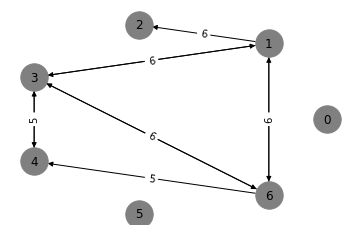

In [7]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights

directed_adj_mat_nx_1 = nx.from_numpy_array(directed_adj_mat_new_1, create_using=nx.DiGraph()) # to specify that the graph is directed
pos=nx.circular_layout(directed_adj_mat_nx_1) # Obtain positions of vertex according to circular graph layout
print(directed_adj_mat_nx_1)
# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx_1, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx_1,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx_1, pos,edge_labels=labels)

plt.axis('off')
plt.show()

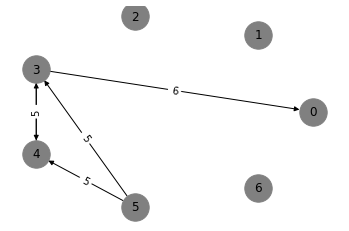

In [8]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights

directed_adj_mat_nx_2 = nx.from_numpy_array(directed_adj_mat_new_2, create_using=nx.DiGraph()) 
pos=nx.circular_layout(directed_adj_mat_nx_2) # Obtain positions of vertex according to circular graph layout

# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx_2, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx_2,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx_2, pos,edge_labels=labels)

plt.axis('off')
plt.show()

## Exercise 4: Adding a new vertex to a graph

<img src="lab5_exercise4.png" width="1000">

In [22]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [23]:
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    
    adj_mat_new=np.zeros((adj_mat.shape[0]+1, adj_mat.shape[0]+1)) 
    for i in range(0, adj_mat.shape[0]):
        for j in range(0, adj_mat.shape[0]):
            adj_mat_new[i][j]=adj_mat[i][j] # copy data from adj_mat to adj_mat_new
        if i in incoming_edges: # add in coming edges, target
            adj_mat_new[i][adj_mat.shape[0]]=1  # [adj_mat.shape[0] is the index of the new vertex
    
    for i in outgoing_edges: # add outgoing edges
        adj_mat_new[adj_mat.shape[0]][i]=1
    return adj_mat_new

In [24]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [25]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

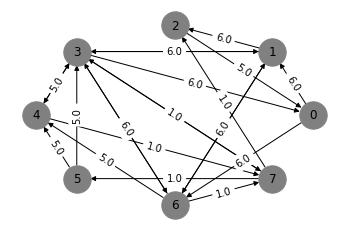

In [26]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights

directed_adj_mat_nx = nx.from_numpy_array(directed_adj_mat_vertex_added, create_using=nx.DiGraph()) 
pos=nx.circular_layout(directed_adj_mat_nx) # Obtain positions of vertex according to circular graph layout

# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx, pos,edge_labels=labels)

plt.axis('off')
plt.show()

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

<img src="lab5_exercise5.png" width="1000">

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [27]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

<img src="damaged_AVA_motor_activities.png" width="450">

## Simulated body movement during gentle tail touch (Damaged brain)

In [28]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x06\x01umdat\x00\x…

In [29]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph

outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph

# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]
rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

In [30]:
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR):
    
    repaired_synaptic_adj_matrix=damaged_synaptic_adj_matrix.copy()
    #aval
    outgoing_aval=rewiring_instructions_AVAL[0] # get outgoing aval triples array
    for i in range(0,len(outgoing_aval)): # iterate through outgoing aval triples array
        repaired_synaptic_adj_matrix[47][outgoing_aval[i][1]]=outgoing_aval[i][2] # get the target and add weight, repair row 47, [i][1] is target index
        
    incoming_aval=rewiring_instructions_AVAL[1] # get incoming aval triples array
    for i in range(0,len(incoming_aval)): # iterate through incoming aval triples array
        repaired_synaptic_adj_matrix[incoming_aval[i][0]][47]=incoming_aval[i][2] # get the source and add weight, repar col 47, target 47, 
        
    #avar
    outgoing_avar=rewiring_instructions_AVAR[0]
    for i in range(0,len(outgoing_avar)):
        repaired_synaptic_adj_matrix[55][outgoing_avar[i][1]]=outgoing_avar[i][2]
        
    incoming_avar=rewiring_instructions_AVAR[1]
    for i in range(0,len(incoming_avar)):
        repaired_synaptic_adj_matrix[incoming_avar[i][0]][55]=incoming_avar[i][2]
    # AVAL, AVAR neurons take the indices of 47, 55 respectively in the damaged_syn_conn_np   
    
    return repaired_synaptic_adj_matrix

In [31]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

Repair operation successful! - Simulating the nervous system and body for gentle tale touch
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


C:\Users\Alan\iCloudDrive\Documents\UW\EE241\Lab5\dynworm\network_sim.py:278: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth'])))))
C:\Users\Alan\iCloudDrive\Documents\UW\EE241\Lab5\dynworm\network_sim.py:308: RuntimeWarning: overflow encountered in exp
  sigmoid_V = np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth']))))


11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


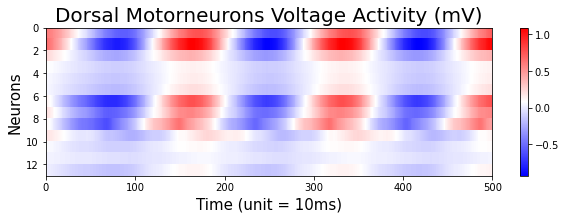

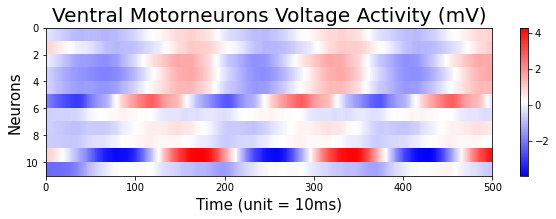

In [32]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain